# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
df = pd.read_csv("winequality-red-wrangled.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


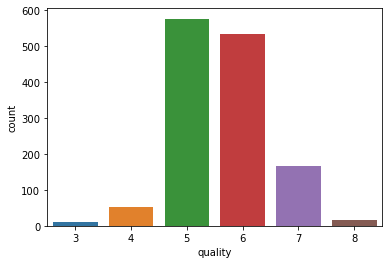

In [4]:
sns.countplot(df['quality'])

 - next we shall create a new column called Review. This column will contain the values of 1 and 2. 
 - 1 - Bad
 - 2 - Good
 - This will be split in the following way. 
 - 1,2,3,4,5 --> Bad
 - 6,7 --> Good
 - Create an empty list called Reviews

In [5]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [6]:
df['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1354    bad
1355    bad
1356    bad
1357    bad
1358    bad
Name: quality, Length: 1359, dtype: category
Categories (2, object): ['bad' < 'good']

In [7]:
df['quality'].value_counts()

bad     1175
good     184
Name: quality, dtype: int64

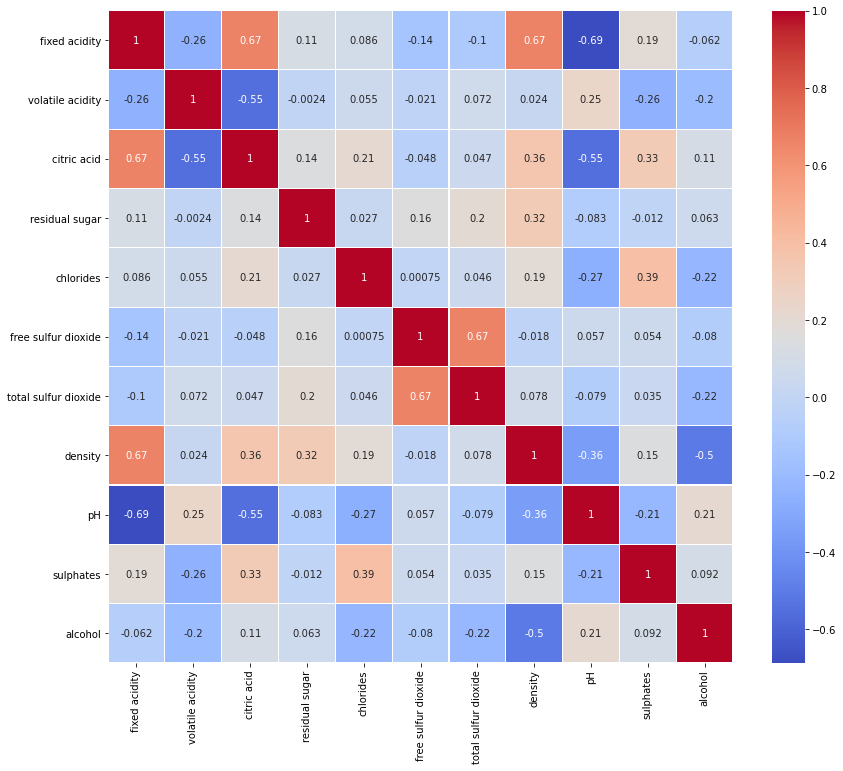

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap='coolwarm', annot=True)
plt.yticks(rotation=0);

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [12]:
df.to_csv('winequality-red-encoded.csv',index=False)

In [13]:
df2 = df

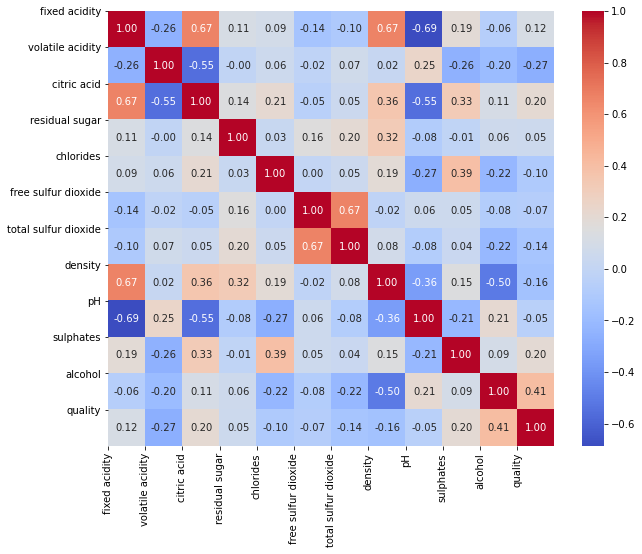

In [14]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [15]:
n = len(df.columns)

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

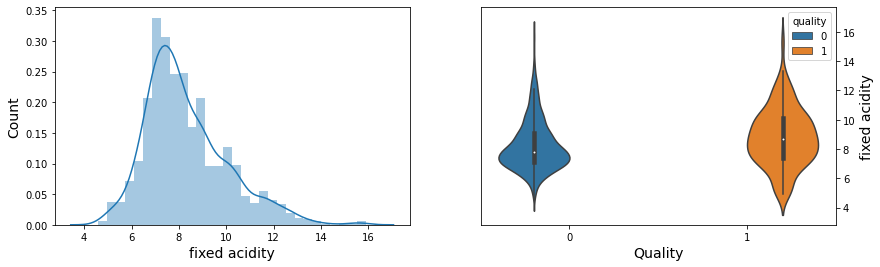

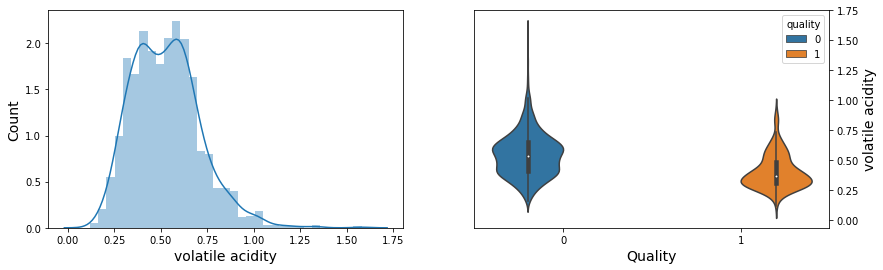

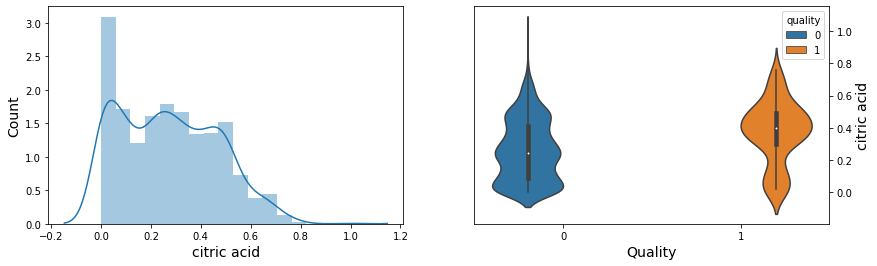

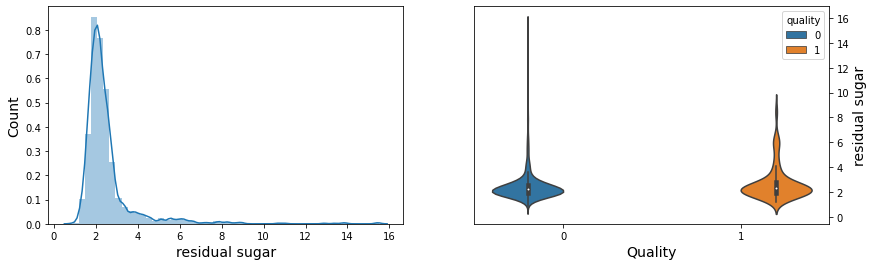

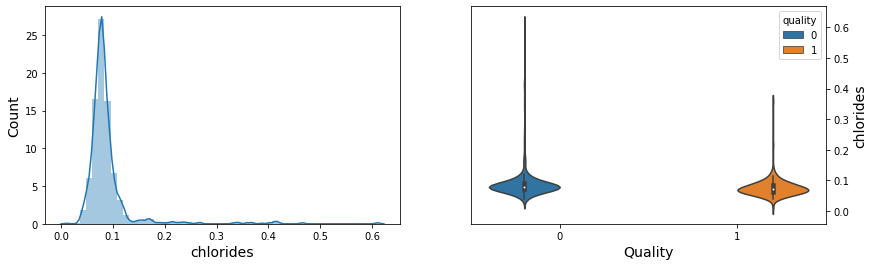

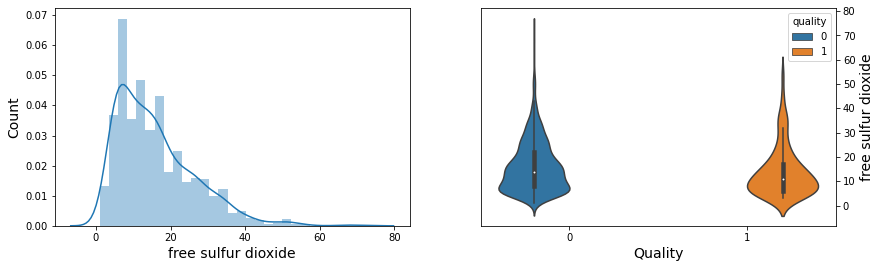

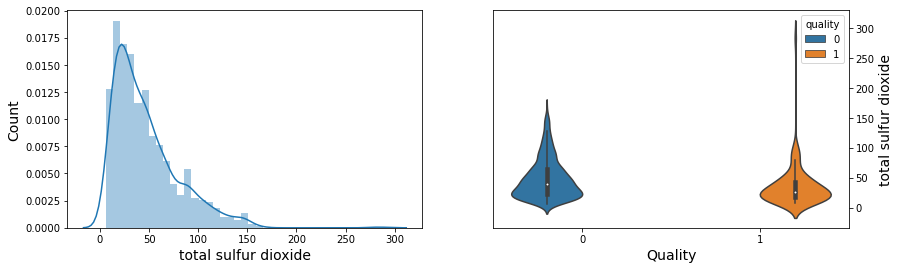

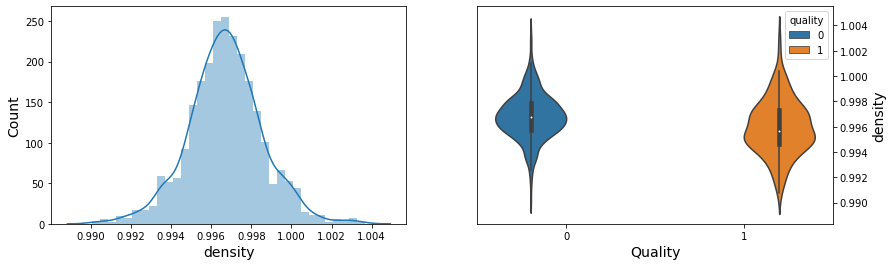

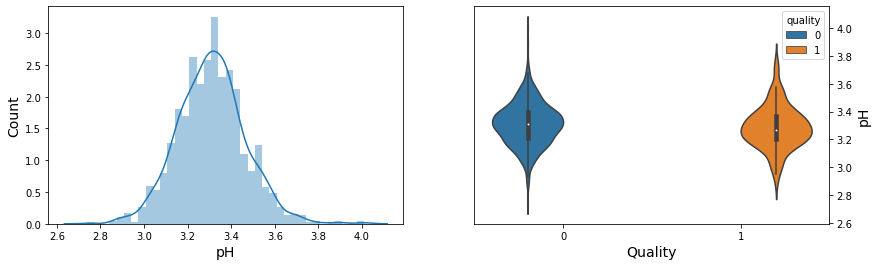

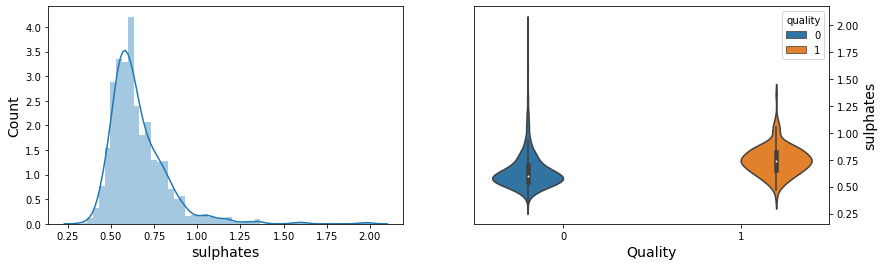

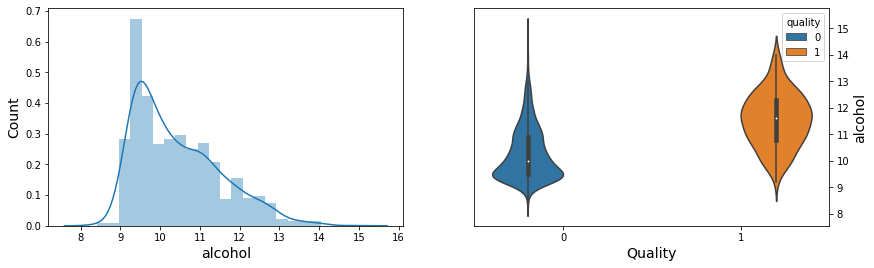

In [17]:
for x in range(n-1):
    f, axes = plt.subplots(1,2,figsize=(14,4))
    column = df.columns[x]
    sns.distplot(df[column], ax = axes[0])
    axes[0].set_xlabel(column, fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].yaxis.tick_left()
    sns.violinplot(x = 'quality', y = column, data = df, hue = 'quality',ax = axes[1])
    axes[1].set_xlabel('Quality', fontsize=14)
    axes[1].set_ylabel(column, fontsize=14)
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

plt.show()

# Outlier Detection

In [18]:
from tqdm.notebook import tqdm

In [19]:
warnings.filterwarnings("ignore")
df_copy = df

def outlier(df1,columns):
    for i in tqdm(columns[0:len(columns)-1]):
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df1[i].loc[df1[i] < lower_bound] = quartile_f
        df1[i].loc[df1[i] > upper_bound] = quartile_l
num_col = df.columns       
outlier(df_copy,num_col)

fixed acidity 3.95 12.349999999999998 5.2 13.242000000000008
volatile acidity 0.015000000000000013 1.0150000000000001 0.2 1.0292000000000008
citric acid -0.42000000000000004 0.94 0.0 0.7042000000000007
residual sugar 0.8499999999999996 3.6500000000000004 1.4 8.3
chlorides 0.03850000000000002 0.12249999999999998 0.042 0.3684200000000001
free sulfur dioxide -14.0 42.0 3.0 50.0
total sulfur dioxide -39.5 124.5 8.0 145.84000000000015
density 0.99227 1.00115 0.9918722000000001 1.0014
pH 2.925 3.6849999999999996 2.94 3.7042000000000006
sulphates 0.28000000000000014 0.9999999999999999 0.43 1.28
alcohol 7.1000000000000005 13.5 9.0 13.4



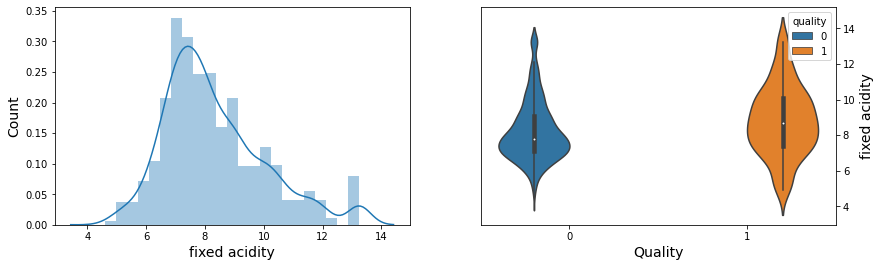

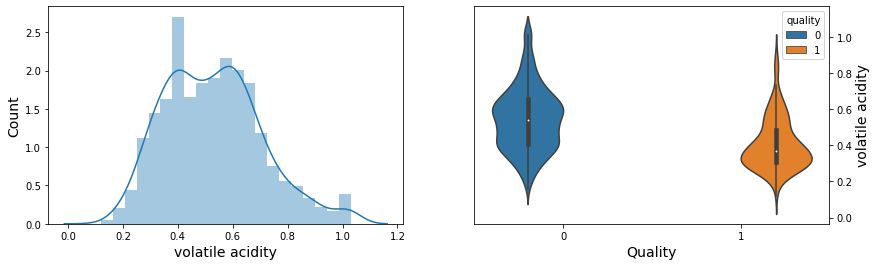

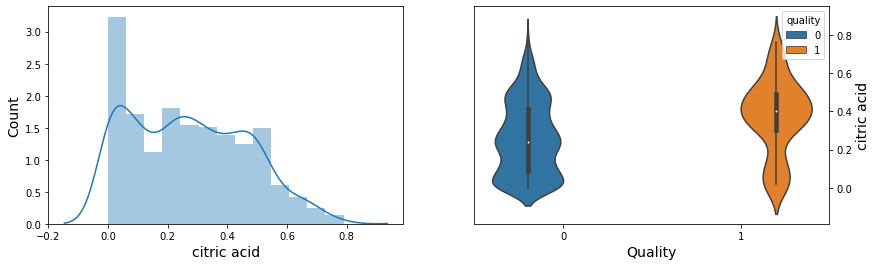

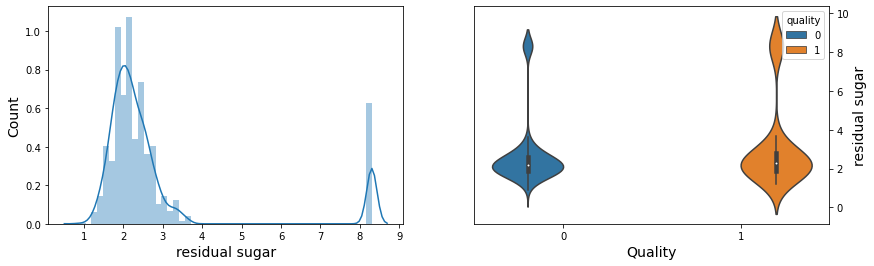

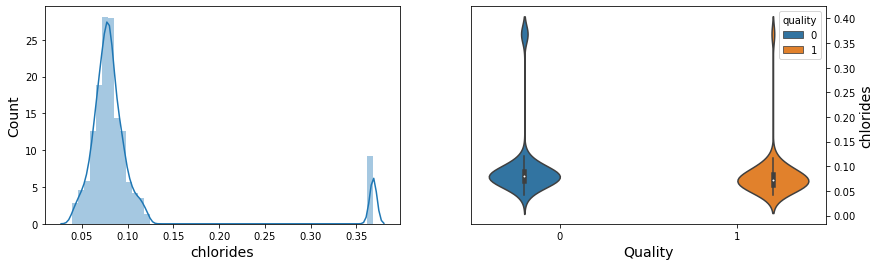

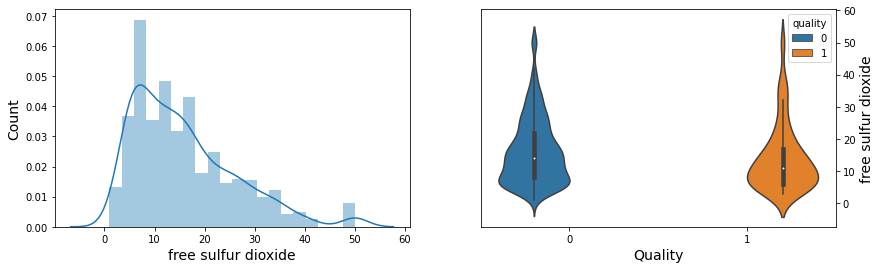

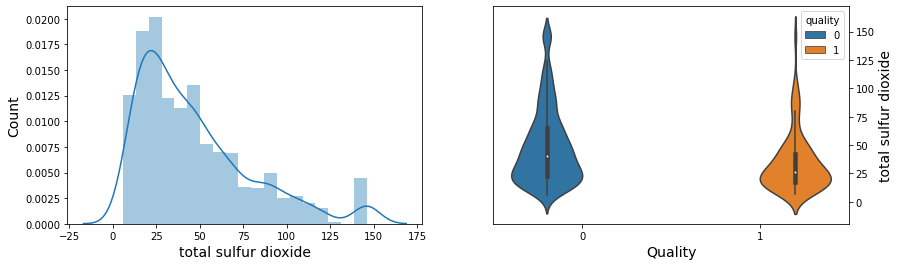

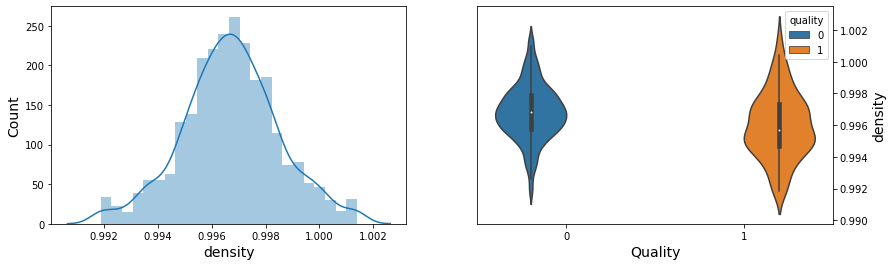

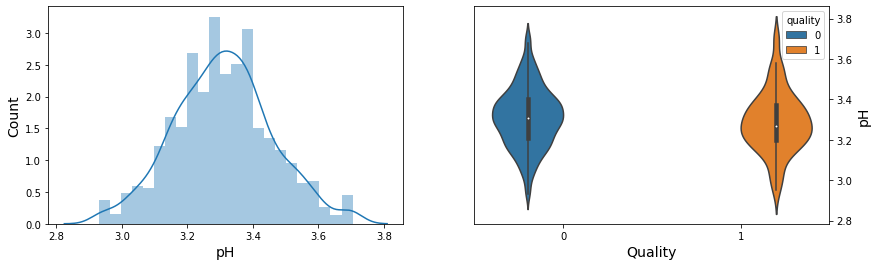

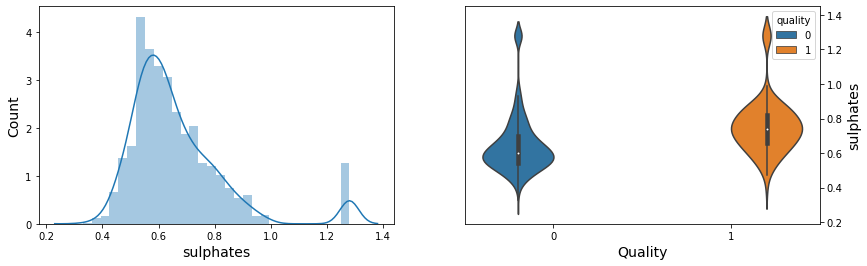

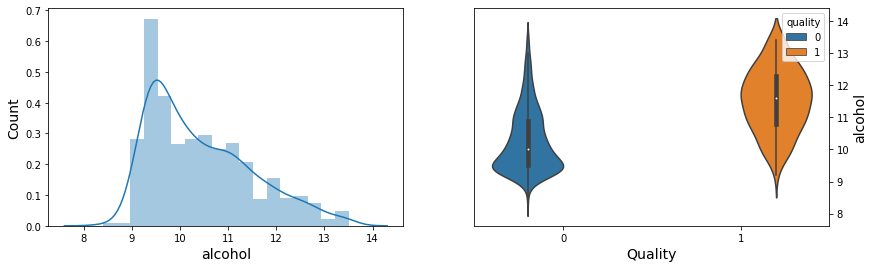

In [20]:
for x in range(n-1):
    f, axes = plt.subplots(1,2,figsize=(14,4))
    column = df_copy.columns[x]
    sns.distplot(df_copy[column], ax = axes[0])
    axes[0].set_xlabel(column, fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].yaxis.tick_left()
    sns.violinplot(x = 'quality', y = column, data = df_copy, hue = 'quality',ax = axes[1])
    axes[1].set_xlabel('Quality', fontsize=14)
    axes[1].set_ylabel(column, fontsize=14)
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

plt.show()

In [21]:
df_alcohol = df[['alcohol','quality']]

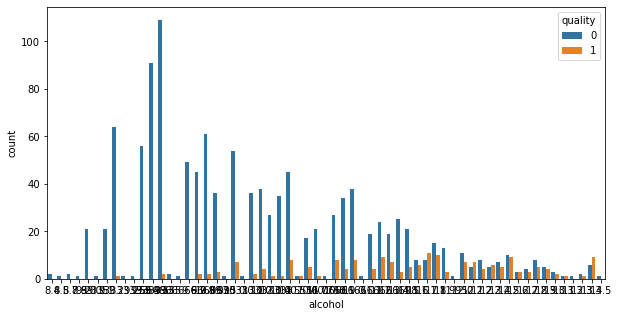

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[['alcohol','quality']],x="alcohol",hue="quality")

<Figure size 1440x720 with 0 Axes>

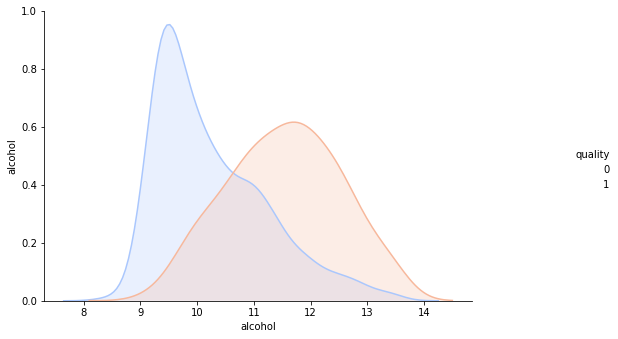

In [23]:
plt.figure(figsize=(20,10))
g = sns.pairplot(df[['alcohol','quality']], hue ="quality", palette ='coolwarm')
g.fig.set_size_inches(10,5)

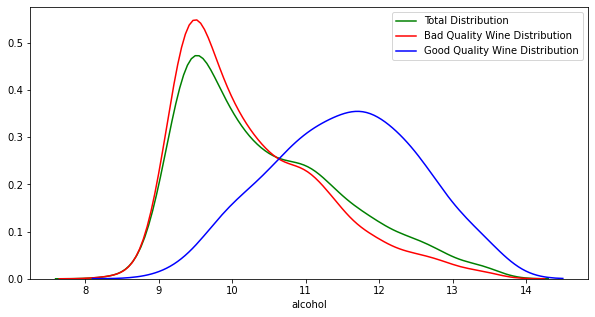

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df['alcohol'],hist=False,color='green',label='Total Distribution')
sns.distplot(df[df['quality']==0]['alcohol'],hist=False,color='red', label='Bad Quality Wine Distribution')
sns.distplot(df[df['quality']==1]['alcohol'],hist=False,color='blue',label='Good Quality Wine Distribution')

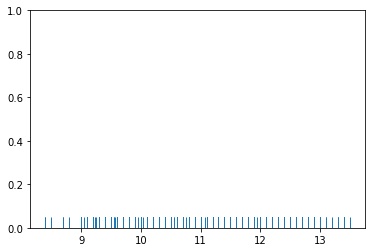

In [25]:
sns.rugplot(df_alcohol['alcohol'])

In [26]:
df[['alcohol']].describe()

,alcohol
count,1359.000000
mean,10.427851
std,1.068150
min,8.400000
25%,9.500000
50%,10.200000
75%,11.100000
max,13.500000


In [27]:
#bins = np.linspace(df['alcohol'].min(),df['alcohol'].max(),num=4)
bins = [0,10,12,16]

In [28]:
bins

[0, 10, 12, 16]

In [29]:
labels2 = ['low', 'medium','high']
df['alcohol'] = pd.cut(x = df['alcohol'], bins = bins, labels = labels2)

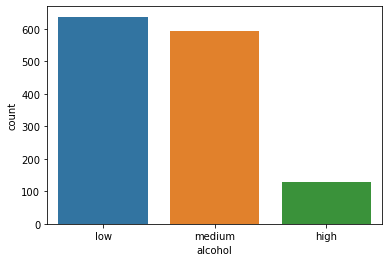

In [30]:
sns.countplot(df['alcohol'])

In [31]:
df['alcohol'].value_counts()

low       637
medium    594
high      128
Name: alcohol, dtype: int64

In [32]:
df['alcohol'].describe()

count     1359
unique       3
top        low
freq       637
Name: alcohol, dtype: object

In [33]:
df['alcohol']

0          low
1          low
2          low
3          low
4          low
         ...  
1354       low
1355    medium
1356    medium
1357    medium
1358    medium
Name: alcohol, Length: 1359, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,low,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,low,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,low,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,low,0


In [57]:
le = LabelEncoder()
label = le.fit_transform(df['alcohol'])

In [58]:
#data = df.drop("alcohol",axis='columns')

In [59]:
df["alcohol"]  = label

In [60]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.526823,0.967437,-1.396766,-0.468591,-0.286544,-0.472221,-0.389808,0.602517,1.336203,-0.586360,1,0
1,-0.295502,1.980100,-1.396766,-0.085050,0.023186,0.885977,0.615217,0.052556,-0.727179,0.108276,1,0
2,-0.295502,1.304992,-1.191446,-0.249425,-0.061286,-0.084165,0.219298,0.162548,-0.327815,-0.065383,1,0
3,1.670732,-1.395443,1.477714,-0.468591,-0.300623,0.109864,0.402030,0.712509,-0.993422,-0.470587,1,0
4,-0.526823,0.742401,-1.396766,-0.523383,-0.300623,-0.278193,-0.207076,0.602517,1.336203,-0.586360,1,0


# Standardization

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   int32  
 11  quality               1359 non-null   int32  
dtypes: float64(10), int32(2)
memory usage: 116.9 KB


In [63]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [64]:
scaler = StandardScaler()
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']] = scaler.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']])
#scaled_df = pd.DataFrame(scaled_df,columns=df.columns)

NameError: name 'scaled_df' is not defined

In [65]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.526823,0.967437,-1.396766,-0.468591,-0.286544,-0.472221,-0.389808,0.602517,1.336203,-0.586360,1,0
1,-0.295502,1.980100,-1.396766,-0.085050,0.023186,0.885977,0.615217,0.052556,-0.727179,0.108276,1,0
2,-0.295502,1.304992,-1.191446,-0.249425,-0.061286,-0.084165,0.219298,0.162548,-0.327815,-0.065383,1,0
3,1.670732,-1.395443,1.477714,-0.468591,-0.300623,0.109864,0.402030,0.712509,-0.993422,-0.470587,1,0
4,-0.526823,0.742401,-1.396766,-0.523383,-0.300623,-0.278193,-0.207076,0.602517,1.336203,-0.586360,1,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   int32  
 11  quality               1359 non-null   int32  
dtypes: float64(10), int32(2)
memory usage: 116.9 KB


In [67]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1087, 11)
Shape of X_test:  (272, 11)
Shape of y_train:  (1087, 1)
Shape of y_test (272, 1)


In [71]:
df.to_csv('../4. Modeling/winequality-red-scaled2.csv',index=False)